# Simple Linear Regression. Minimal Example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000

#np.random.uniform(low,high,size) draws a random value from the interval(low,high), where each number has an equal chance to be selected
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

# Combination

# np.column_stack(appropiate tuples)takes a sequence of 1D arrays and stack them into a single 2D array
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


## Create the target we will aim at

The point is to see that there is a strong trend that our model should learn to reproduce.

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1000,)  and requested shape (1000,1)

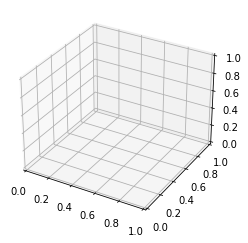

In [4]:
targets = targets.reshape(observations,)

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

targets = targets.reshape(observations,1)

In [5]:
## Initialize variables

# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m
# k is the number of input variables and m is the number of output variables
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.04148206]
 [-0.0730036 ]]
[-0.04939404]


## Set a learning rate

In [6]:
learning_rate = 0.02

## Train the model

In [7]:
# Loop to calculate the outputs and compare them to the targets
for i in range(100):
    
    # np.dot(A,B) is a method used for multiplying matrices.
    outputs = np.dot(inputs,weights) + biases
    
    # deltas record the difference between outputs and targets
    deltas = outputs - targets
    
    # np.sum(a) is the method that allows us to sum all the values in the array
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    # The weights are updated in a linear algebraic way
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

221102.56258843234
5063133.678677837
1753196737.6547785
632858418569.3483
228472306422364.5
8.248229032393166e+16
2.9777474258285617e+19
1.0750161879874608e+22
3.880986662639919e+24
1.401100527033611e+27
5.0582051872307375e+29
1.8260959311961095e+32
6.592509055087628e+34
2.380005064298285e+37
8.592212856672658e+39
3.101931289215042e+42
1.1198486214804267e+45
4.042839180196529e+47
1.4595319691803417e+50
5.269152380570066e+52
1.9022513652276583e+55
6.867442797543468e+57
2.479260703376463e+60
8.950542169066884e+62
3.2312941116334105e+65
1.1665507450444498e+68
4.211441588880497e+70
1.5204002339286556e+73
5.48889690749526e+75
1.9815827825323003e+78
7.153842366152788e+80
2.582655695784853e+83
9.323815233235306e+85
3.366051876190649e+88
1.215200532161879e+91
4.387075385890086e+93
1.5838069464339886e+96
5.717805651665653e+98
2.064222634193521e+101
7.452185931285658e+103
2.6903626689545076e+106
9.712655262823419e+108
3.506429573344877e+111
1.265879208118154e+114
4.570033807971861e+116
1.6498579

## Print weight and biases and see if we have worked correctly

In [8]:
print(weights,biases)

[[3.83343469e+124 3.83343469e+124 3.83343469e+124 ... 3.83343469e+124
  3.83343469e+124 3.83343469e+124]
 [4.43340543e+124 4.43340543e+124 4.43340543e+124 ... 4.43340543e+124
  4.43340543e+124 4.43340543e+124]] [-3.90144205e+128]


## Plot last output vs target

Since they are the last at the end of the training, they represent the fianl model accuracy.

The closer this plot a 45 degree line, the closer target output values are

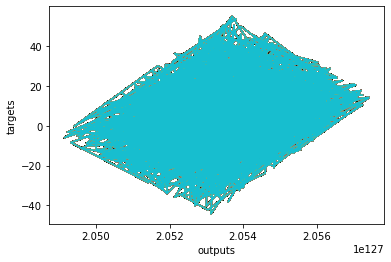

In [9]:
# Create graph
plt.plot(outputs,targets)

# x and y labels
plt.xlabel('outputs')
plt.ylabel('targets')

#Print graph
plt.show()